In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
# Download the audio files here: 
path = "/Users/tylerlam/Downloads/ravdess-emotional-speech-audio" # edit this path
actor_ids = [
    '01',
    '03',
    '05',
    '07',
    '09',
    '11',
    '13',
    '15',
    '17',
    '19',
    '21',
    '23'
]

actor_files = [
    '03-01-04-01-01-01',
    '03-01-01-01-01-01',
    '03-01-06-02-01-01',
    '03-01-01-01-01-02',
    '03-01-04-01-01-02',
    '03-01-06-02-01-02',
    '03-01-01-01-02-01',
    '03-01-04-01-02-01',
    '03-01-06-02-02-01',
    '03-01-01-01-02-02',
    '03-01-04-01-02-02',
    '03-01-06-02-02-02',
    '03-01-02-01-01-01',
    '03-01-04-02-01-01',
    '03-01-07-01-01-01',
    '03-01-02-01-01-02',
    '03-01-04-02-01-02',
    '03-01-07-01-01-02',
    '03-01-02-01-02-01',
    '03-01-04-02-02-01',
    '03-01-07-01-02-01',
    '03-01-02-01-02-02',
    '03-01-04-02-02-02',
    '03-01-07-01-02-02',
    '03-01-02-02-01-01',
    '03-01-05-01-01-01',
    '03-01-07-02-01-01',
    '03-01-02-02-01-02',
    '03-01-05-01-01-02',
    '03-01-07-02-01-02',
    '03-01-02-02-02-01',
    '03-01-05-01-02-01',
    '03-01-07-02-02-01',
    '03-01-02-02-02-02',
    '03-01-05-01-02-02',
    '03-01-07-02-02-02',
    '03-01-03-01-01-01',
    '03-01-05-02-01-01',
    '03-01-08-01-01-01',
    '03-01-03-01-01-02',
    '03-01-05-02-01-02',
    '03-01-08-01-01-02',
    '03-01-03-01-02-01',
    '03-01-05-02-02-01',
    '03-01-08-01-02-01',
    '03-01-03-01-02-02',
    '03-01-05-02-02-02',
    '03-01-08-01-02-02',
    '03-01-03-02-01-01',
    '03-01-06-01-01-01',
    '03-01-08-02-01-01',
    '03-01-03-02-01-02',
    '03-01-06-01-01-02',
    '03-01-08-02-01-02',
    '03-01-03-02-02-01',
    '03-01-06-01-02-01',
    '03-01-08-02-02-01',
    '03-01-03-02-02-02',
    '03-01-06-01-02-02',
    '03-01-08-02-02-02'
]

def extract_features(fn):
    audio, sample_rate = librosa.load(fn)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    return mfccs_processed


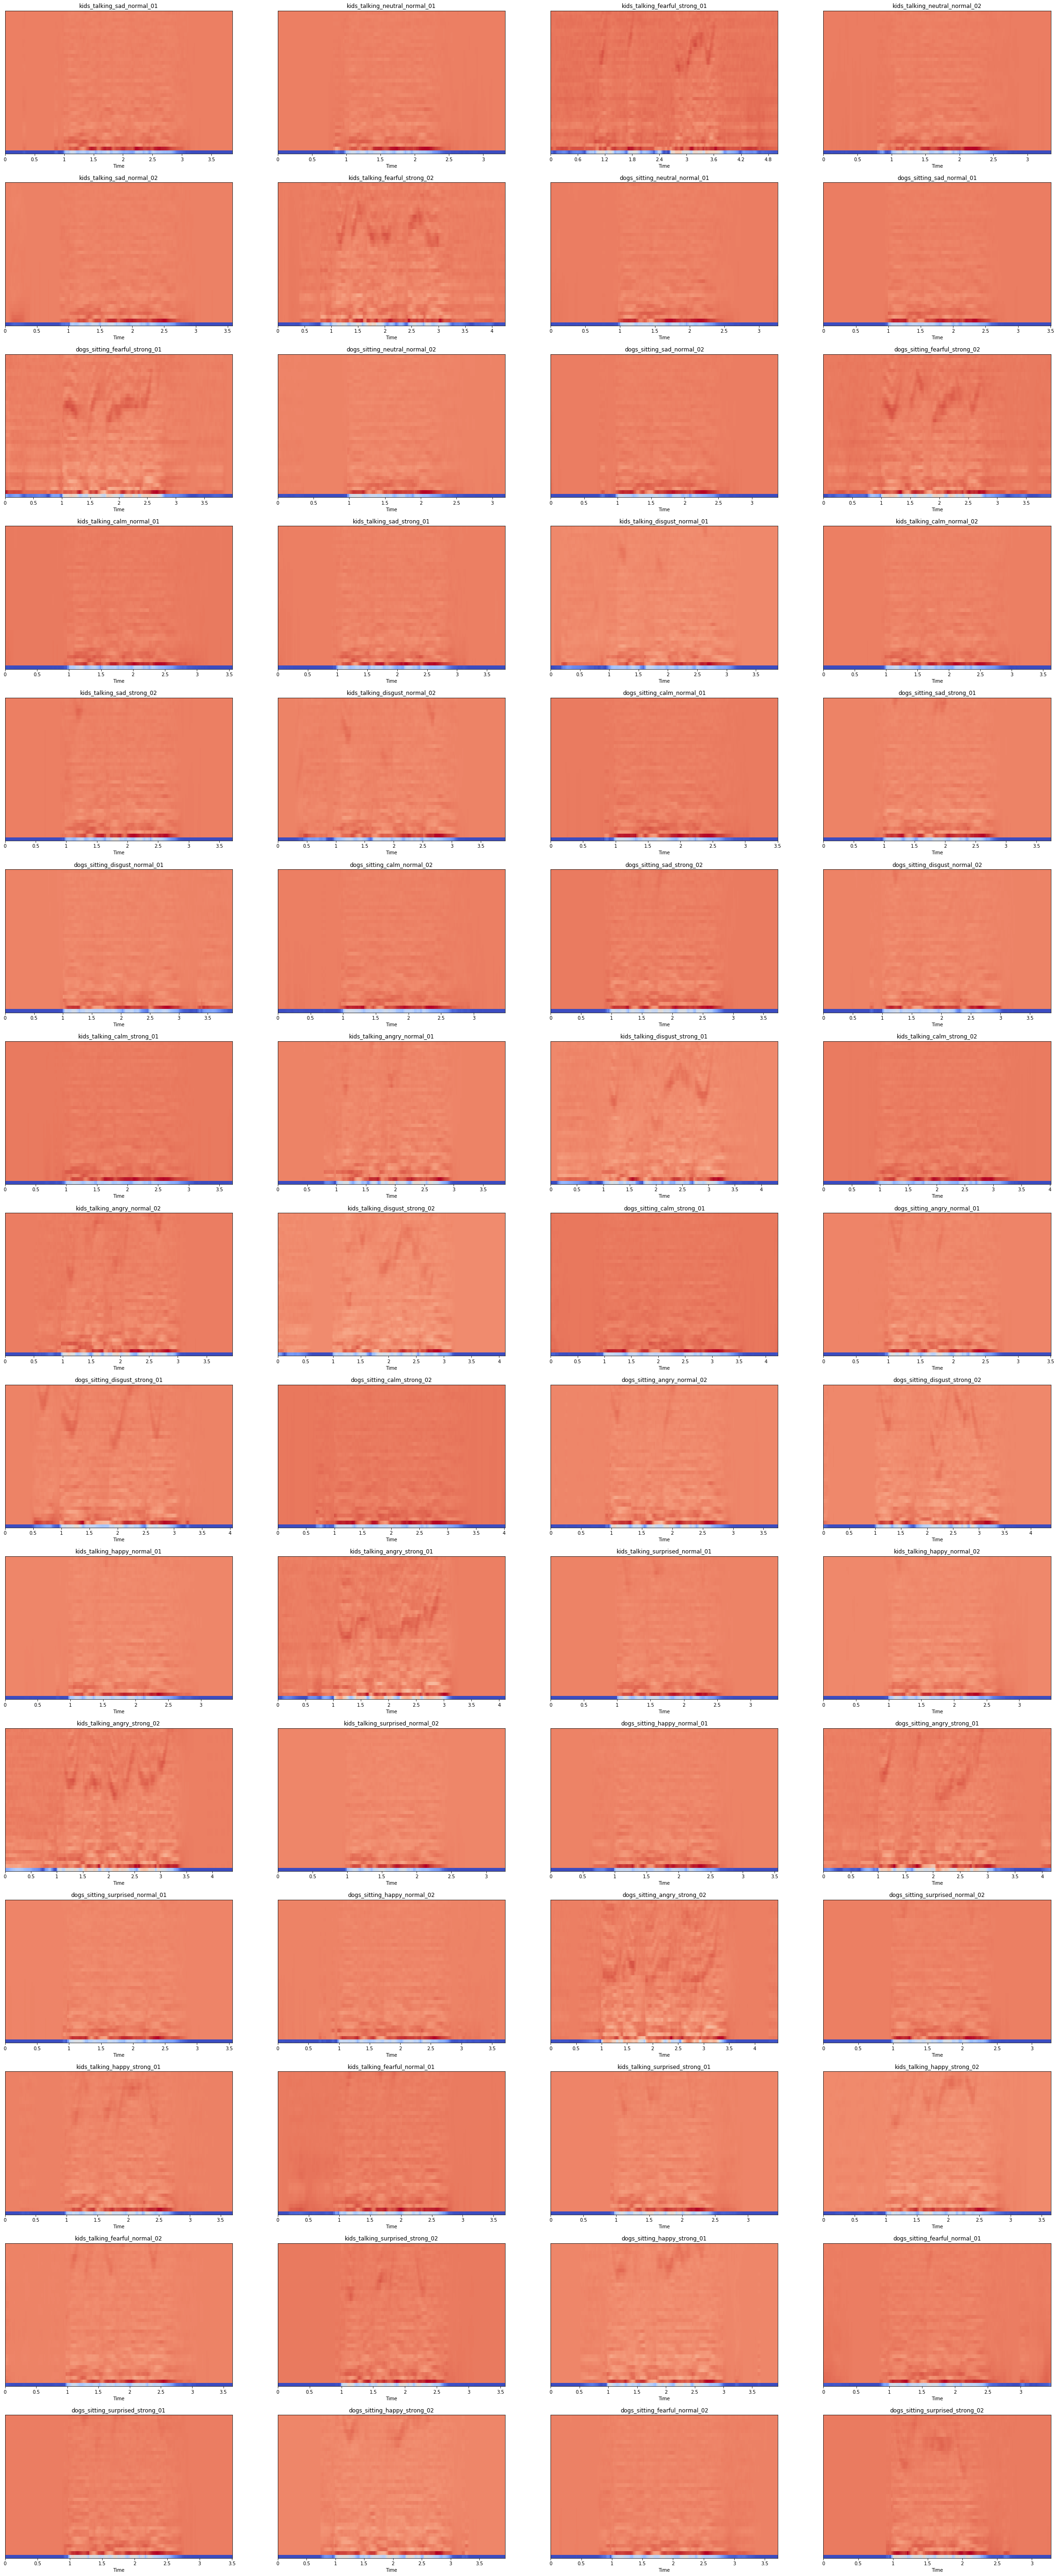

In [55]:
# lets try plotting
plt.figure(figsize=(40,100))

for idx, audio_file in enumerate(actor_files, start=1):
    label = filename_to_label(audio_file)
    fn = "{:}/Actor_{:}/{:}-{:}.wav".format(path, actor_id, audio_file, actor_id)
    audio, sample_rate = librosa.load(fn)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
    plt.subplot(15, 4, idx)
    plt.title(label)
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')


In [3]:
# extract features and put it in a dataframe
features = []

for actor_id in actor_ids:
    for idx, audio_file in enumerate(actor_files, start=1):
        try:
            fn = "{:}-{:}.wav".format(audio_file, actor_id)

            file_path = "{:}/Actor_{:}/{:}".format(path, actor_id, fn)
            data = extract_features(file_path)

            features.append([fn, data])
        except FileNotFoundError:
            print("Didn't find this file: {:}".format(file_path))
    
featuresdf = pd.DataFrame(features, columns=['file_name', 'feature'])


In [4]:
# Apply tsne to visualize and see if there is possible clustering
data = featuresdf['feature'].tolist()
tsne_results = TSNE(n_components=2).fit_transform(data)
tsnedf = pd.DataFrame(tsne_results, columns=['x', 'y'])


In [5]:
# Generate labels to segment data
is_excited = {
    '01': 'neutral', # neutral
    '02': 'neutral', # calm
    '03': 'excited', # happy
    '04': 'neutral', # sad
    '05': 'excited', # angry
    '06': 'excited', # fearful
    '07': 'excited', # disgust
    '08': 'excited' # surprised
}

emotions = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

intensities = {
    '01': 'normal',
    '02': 'strong',
}

statements = {
    '01': 'kids_talking',
    '02': 'dogs_sitting',
}

def filename_to_label(fn, labels_to_include):
    ids = fn.split('-')
    statement = statements[ids[4]]
    emotion = emotions[ids[2]]
    intensity = intensities[ids[3]]
    repetition = ids[5]
    excitement = is_excited[ids[2]]
    
    label_dict = {
        'statement': statement,
        'emotion': emotion,
        'intensity': intensity,
        'repetition': repetition,
        'excitement': excitement,
    }
    labels = []
    for label in labels_to_include:
        labels.append(label_dict[label])
    
    return '_'.join(labels)

featuresdf['emotion'] = featuresdf.apply(lambda row: filename_to_label(row.file_name, ['emotion']), axis=1)
featuresdf['excitement'] = featuresdf.apply(lambda row: filename_to_label(row.file_name, ['excitement']), axis=1)
featuresdf['intensity'] = featuresdf.apply(lambda row: filename_to_label(row.file_name, ['intensity']), axis=1)
featuresdf['intensity_excitement'] = featuresdf.apply(lambda row: filename_to_label(row.file_name, ['intensity', 'excitement']), axis=1)

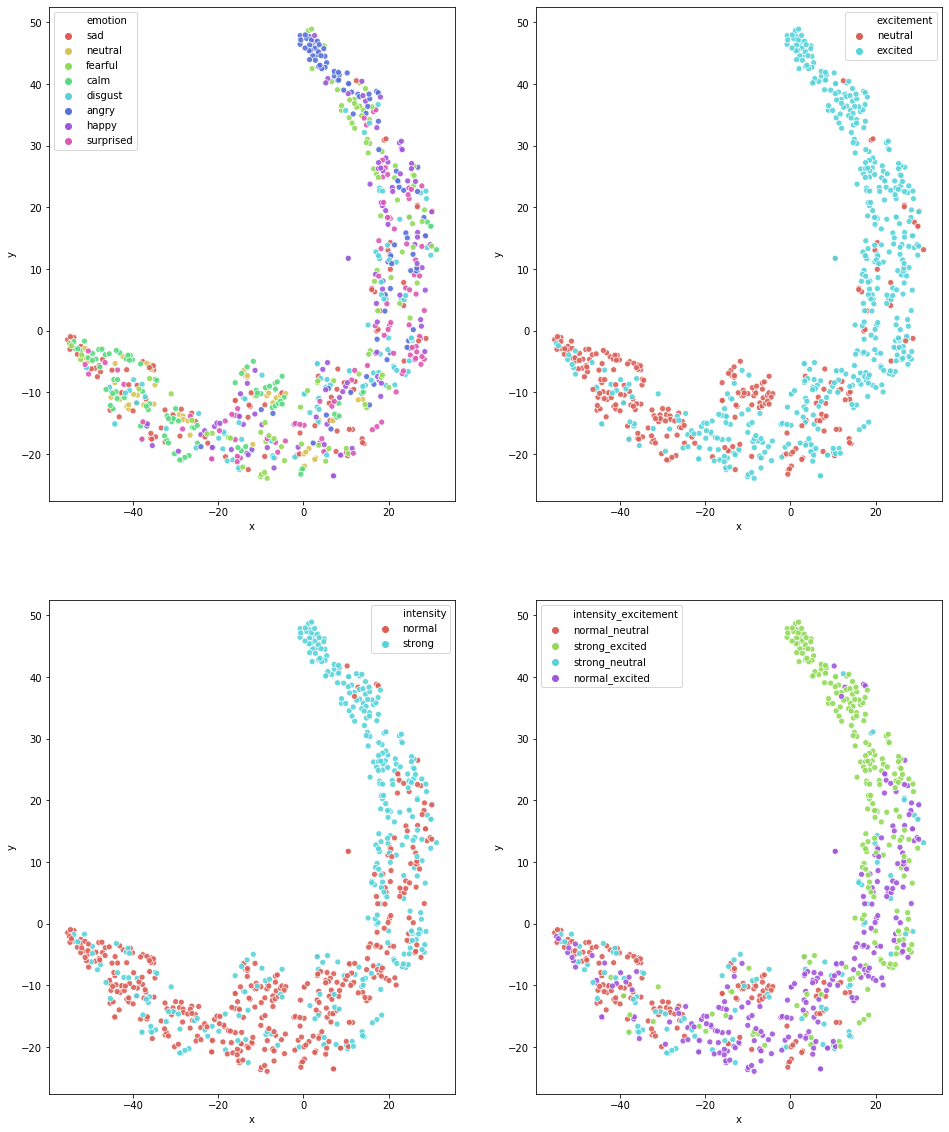

In [6]:
# plot too see if clustering by emotion
tsnedf['emotion'] = featuresdf['emotion'].values

plt.figure(figsize=(16,20))
plt.subplot(2, 2, 1)
sns.scatterplot(
    x="x", y="y",
    hue="emotion",
    palette=sns.color_palette("hls", 8),
    data=tsnedf,
    legend="full",
    alpha=0.9
)

tsnedf['excitement'] = featuresdf['excitement'].values

plt.subplot(2, 2, 2)
sns.scatterplot(
    x="x", y="y",
    hue="excitement",
    palette=sns.color_palette("hls", 2),
    data=tsnedf,
    legend="full",
    alpha=0.9
)

tsnedf['intensity'] = featuresdf['intensity'].values

plt.subplot(2, 2, 3)
sns.scatterplot(
    x="x", y="y",
    hue="intensity",
    palette=sns.color_palette("hls", 2),
    data=tsnedf,
    legend="full",
    alpha=0.9
)

tsnedf['intensity_excitement'] = featuresdf['intensity_excitement'].values

plt.subplot(2, 2, 4)
sns.scatterplot(
    x="x", y="y",
    hue="intensity_excitement",
    palette=sns.color_palette("hls", 4),
    data=tsnedf,
    legend="full",
    alpha=0.9
)


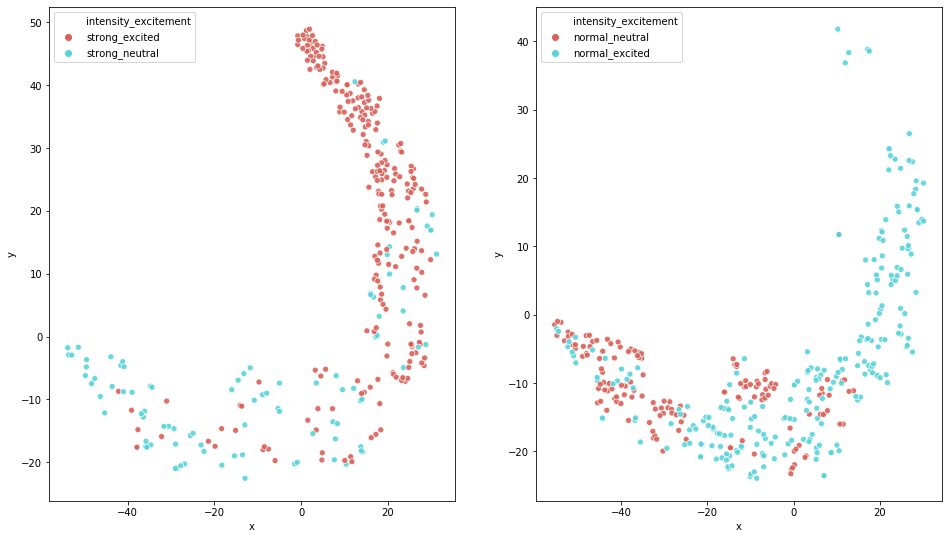

In [7]:
# I suspect a mix of normal and strong intesities cause clusters to mix.
# Let's try only plotting strong intensity audio files

strong_tsnedf = tsnedf[tsnedf['intensity'].eq('strong')]

plt.figure(figsize=(16,20))
plt.subplot(2,2,1)
sns.scatterplot(
    x="x", y="y",
    hue="intensity_excitement",
    palette=sns.color_palette("hls", 2),
    data=strong_tsnedf,
    legend="full",
    alpha=0.9
)

# plotting normal intensity
normal_tsnedf = tsnedf[tsnedf['intensity'].eq('normal')]

plt.subplot(2,2,2)
sns.scatterplot(
    x="x", y="y",
    hue="intensity_excitement",
    palette=sns.color_palette("hls", 2),
    data=normal_tsnedf,
    legend="full",
    alpha=0.9
)
                                                                                                                                          

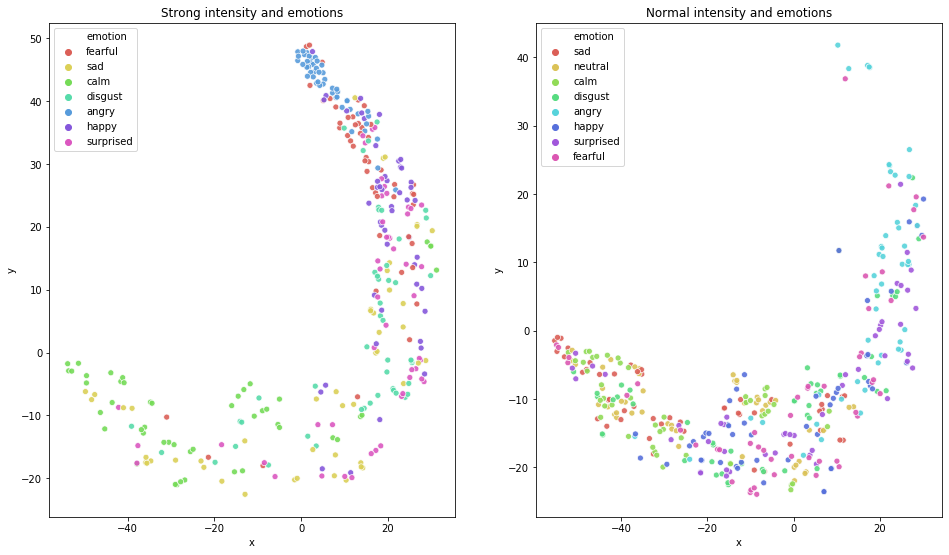

In [8]:
# we see some better separation when looking only at 1 intensity. Let's see what emotions are well separated 
plt.figure(figsize=(16,20))

# strong intensity
plt.subplot(2,2,1)
plt.title('Strong intensity and emotions')
sns.scatterplot(
    x="x", y="y",
    hue="emotion",
    palette=sns.color_palette("hls", 7),
    data=strong_tsnedf,
    legend="full",
    alpha=0.9
)

# normal intensity
plt.subplot(2,2,2)
plt.title('Normal intensity and emotions')
sns.scatterplot(
    x="x", y="y",
    hue="emotion",
    palette=sns.color_palette("hls", 8),
    data=normal_tsnedf,
    legend="full",
    alpha=0.9
)


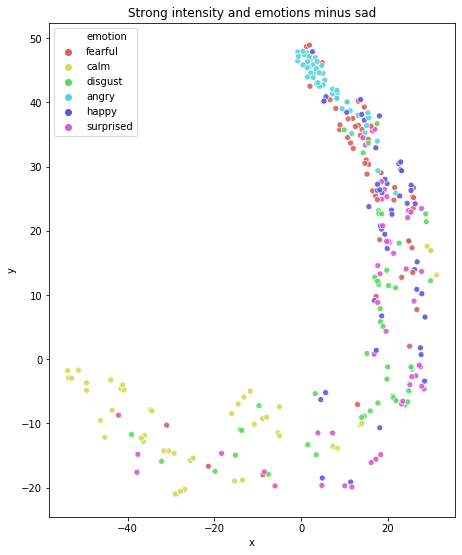

In [9]:
# Strong intensity results in better seperation. Angry, fearfull, surprised, happy, (and maybe disgust?) 
# seem clustered towards the top. calm seems clusted towards the bottom. Sad is kinda scattered around

# Lets try removing some emotions? 

# remove sad and plot 
no_sad = strong_tsnedf[strong_tsnedf['emotion'] != 'sad']

plt.figure(figsize=(16,20))
plt.subplot(2,2,1)
plt.title('Strong intensity and emotions minus sad')
sns.scatterplot(
    x="x", y="y",
    hue="emotion",
    palette=sns.color_palette("hls", 6),
    data=no_sad,
    legend="full",
    alpha=0.9
)


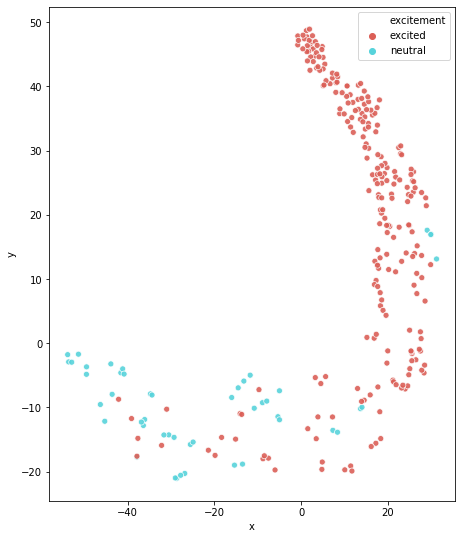

In [10]:
# That looks better. Disgust and surprised cause some mixing still.
# Lets plot no_sad as excited vs neutral

plt.figure(figsize=(16,20))
plt.subplot(2,2,1)
sns.scatterplot(
    x="x", y="y",
    hue="excitement",
    palette=sns.color_palette("hls", 2),
    data=no_sad,
    legend="full",
    alpha=0.9
)

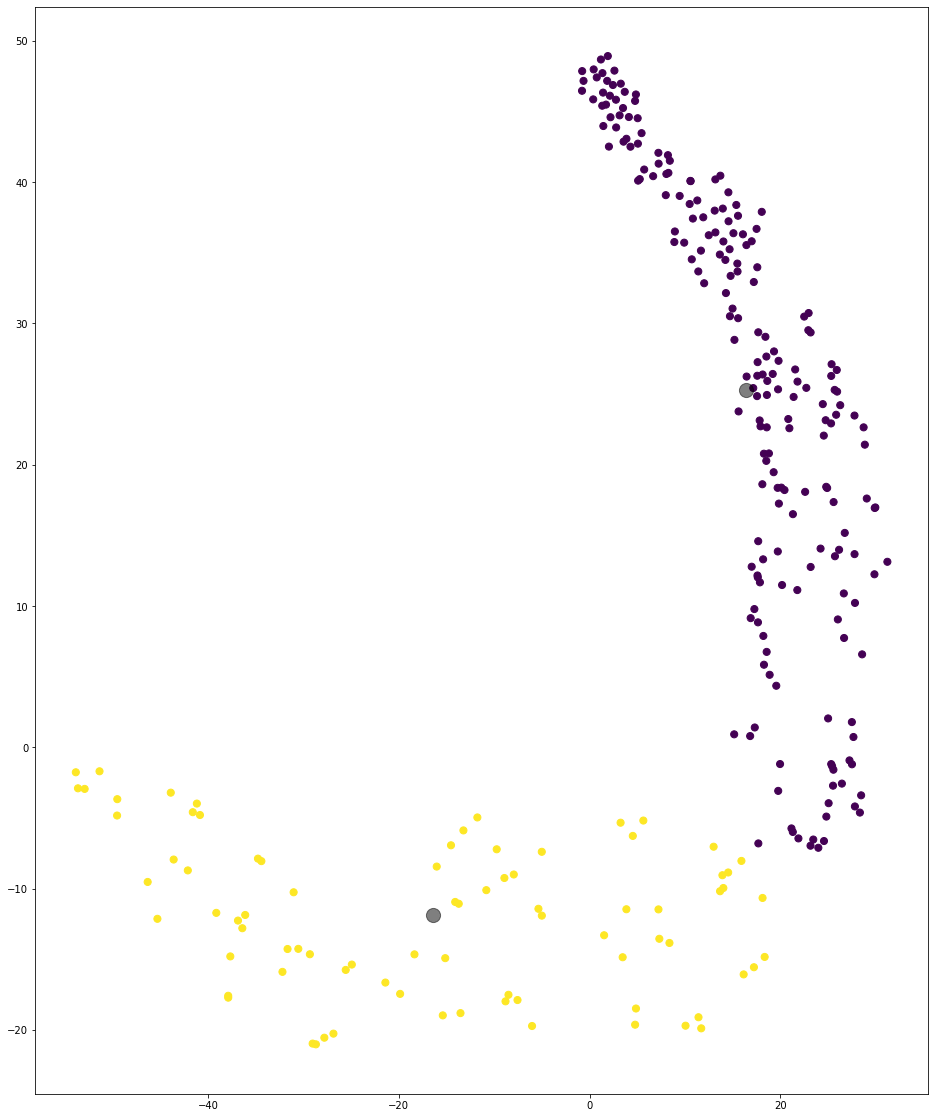

In [14]:
# lets try k means on this bitch
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(no_sad[['x', 'y']])
y_kmeans = kmeans.predict(no_sad[['x', 'y']])

plt.figure(figsize=(16, 20))
plt.scatter(no_sad['x'], no_sad['y'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [23]:
from sklearn.metrics import accuracy_score

classes = ['excited', 'neutral']
predicted = []
for y in y_kmeans:
    predicted.append(classes[y])

truth = no_sad['excitement']

print(accuracy_score(truth, predicted))


0.8576388888888888


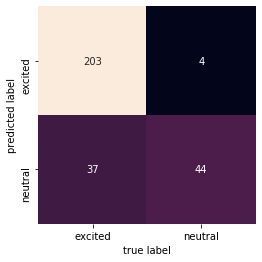

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(truth, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=classes,
            yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label');